In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
path = "data\\segments.csv"

data = pd.read_csv(path)
data.head()


,age,Income,Under18AtHome,HomeOwnership,subscribe,Segment
0,45.0,50033.0,4,0,0,Suburban
1,25.0,10835.0,3,0,0,Urban
2,46.0,63281.0,1,0,0,Suburban
3,40.0,46201.0,2,1,0,Suburban
4,41.0,49343.0,1,1,0,Suburban


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            885 non-null    float64
 1   Income         853 non-null    float64
 2   Under18AtHome  1000 non-null   int64  
 3   HomeOwnership  1000 non-null   int64  
 4   subscribe      1000 non-null   int64  
 5   Segment        995 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [71]:
data['age'] = data['age'].fillna(data['age'].mean())
data['Income'] = data['Income'].fillna(data['Income'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1000 non-null   float64
 1   Income         1000 non-null   float64
 2   Under18AtHome  1000 non-null   int64  
 3   HomeOwnership  1000 non-null   int64  
 4   subscribe      1000 non-null   int64  
 5   Segment        995 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [72]:
data.Segment = data.Segment.fillna('Unreported')
data

,age,Income,Under18AtHome,HomeOwnership,subscribe,Segment
0,45.000000,50033.000000,4,0,0,Suburban
1,25.000000,10835.000000,3,0,0,Urban
2,46.000000,63281.000000,1,0,0,Suburban
3,40.000000,46201.000000,2,1,0,Suburban
4,41.000000,49343.000000,1,1,0,Suburban
...,...,...,...,...,...,...
995,41.000000,76813.000000,3,1,0,Suburban
996,21.000000,30868.000000,1,0,0,Urban
997,35.000000,57097.000000,4,1,0,ExUrban
998,38.000000,45875.000000,3,0,0,ExUrban


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1000 non-null   float64
 1   Income         1000 non-null   float64
 2   Under18AtHome  1000 non-null   int64  
 3   HomeOwnership  1000 non-null   int64  
 4   subscribe      1000 non-null   int64  
 5   Segment        1000 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [102]:
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1000 non-null   int32  
 1   Income         1000 non-null   float64
 2   Under18AtHome  1000 non-null   int64  
 3   HomeOwnership  1000 non-null   int64  
 4   subscribe      1000 non-null   int64  
 5   Segment        1000 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 50.8+ KB


In [103]:
data['Client'] = np.arange(len(data))
data

,age,Income,Under18AtHome,HomeOwnership,subscribe,Segment,Client
Client,,,,,,,
0,45,50033.000000,4,0,0,Suburban,0
1,25,10835.000000,3,0,0,Urban,1
2,46,63281.000000,1,0,0,Suburban,2
3,40,46201.000000,2,1,0,Suburban,3
4,41,49343.000000,1,1,0,Suburban,4
...,...,...,...,...,...,...,...
995,41,76813.000000,3,1,0,Suburban,995
996,21,30868.000000,1,0,0,Urban,996
997,35,57097.000000,4,1,0,ExUrban,997


In [105]:
data=data.set_index('Client')
data

,age,Income,Under18AtHome,HomeOwnership,subscribe,Segment
Client,,,,,,
0,45,50033.000000,4,0,0,Suburban
1,25,10835.000000,3,0,0,Urban
2,46,63281.000000,1,0,0,Suburban
3,40,46201.000000,2,1,0,Suburban
4,41,49343.000000,1,1,0,Suburban
...,...,...,...,...,...,...
995,41,76813.000000,3,1,0,Suburban
996,21,30868.000000,1,0,0,Urban
997,35,57097.000000,4,1,0,ExUrban


Now, as we can see, the data has been manipulated to replace null (NaN) values for the 'age' and 'income' columns with the mean value of those columns since the mean is a reliable and representative parameter of the data set to report missing values and replace these values so that all data is accounted for. I also replaced the 'segment' data that was originally null with the string 'Unreported' to indicate that these values were not reported during data entry. 

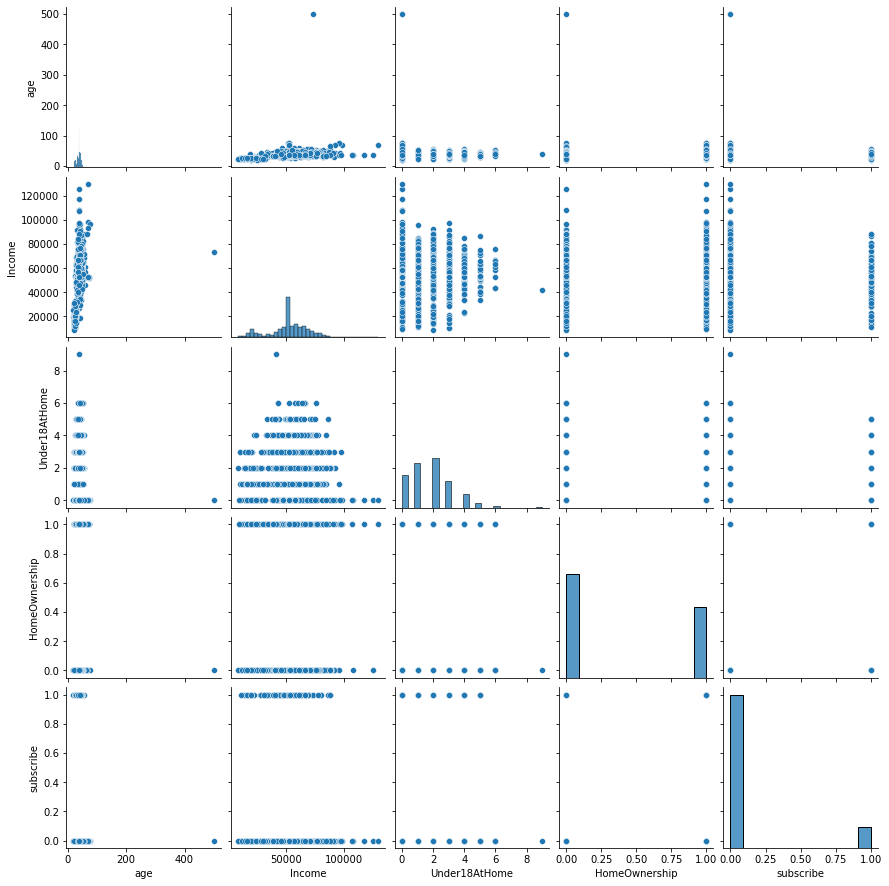

In [106]:
modelvar = data.loc[:,
    ['age', 'Income', 'Under18AtHome', 'HomeOwnership', 'subscribe']]

sns.pairplot(modelvar)

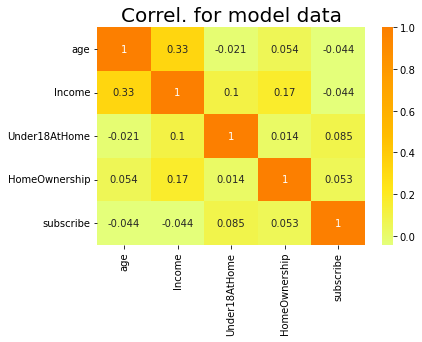

In [107]:
sns.heatmap(modelvar.corr(), cmap = 'Wistia', annot = True)
plt.title('Correl. for model data', fontsize = 20)
plt.show()

We can see from these plots that the highest correlations among two seemingly independent variables is 0.33, between 'age' and 'income'. Now, we can initiate planning to cluster by KMeans.

In [108]:

data

,age,Income,Under18AtHome,HomeOwnership,subscribe,Segment
Client,,,,,,
0,45,50033.000000,4,0,0,Suburban
1,25,10835.000000,3,0,0,Urban
2,46,63281.000000,1,0,0,Suburban
3,40,46201.000000,2,1,0,Suburban
4,41,49343.000000,1,1,0,Suburban
...,...,...,...,...,...,...
995,41,76813.000000,3,1,0,Suburban
996,21,30868.000000,1,0,0,Urban
997,35,57097.000000,4,1,0,ExUrban


In [112]:
#data=data.drop('Under18AtHome', 1)
data=data.drop('HomeOwnership', 1)
data=data.drop('subscribe', 1)
data=data.drop('Segment', 1)
data

C:\Users\Alec\AppData\Local\Temp/ipykernel_18508/844593899.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data=data.drop('HomeOwnership', 1)
C:\Users\Alec\AppData\Local\Temp/ipykernel_18508/844593899.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data=data.drop('subscribe', 1)
C:\Users\Alec\AppData\Local\Temp/ipykernel_18508/844593899.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data=data.drop('Segment', 1)


,age,Income
Client,,
0,45,50033.000000
1,25,10835.000000
2,46,63281.000000
3,40,46201.000000
4,41,49343.000000
...,...,...
995,41,76813.000000
996,21,30868.000000
997,35,57097.000000


In [113]:
#Unskewing the data
data_log = data[['age', 'Income']].apply(np.log, axis = 1).round(3)


Can only proceed to standardize data with nonzero values, since log(0) = infinity or does not exist, depends on your interpretation. Quantitative, nonzero values exist only in variables 'age', and 'Income', thus, these are the variables we will be plotting. They also share a correlation nonetheless, thus, they are suitable for clustering. First, we must standardize the data.

In [114]:
#Standardizing the data 

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
rfm_std = scale.fit_transform(data_log)


In [115]:
rfm_std

array([[ 0.88151441,  0.04713402],
       [-1.6006378 , -3.59155711],
       [ 0.97438405,  0.60638347],
       ...,
       [-0.18226511,  0.36364541],
       [ 0.16810671, -0.15752748],
       [ 0.05413034,  0.17564241]])

In [116]:
rfm_std.shape[0]

1000

In [117]:
rfm_std.shape[1]

2

In [118]:
data.shape[1]

2

In [119]:
data_std = pd.DataFrame(data = rfm_std, 
                            index = data.index, 
                            columns = data.columns)
data_std.describe()

,age,Income
count,1.000000e+03,1.000000e+03
mean,-6.370876e-16,1.562611e-15
std,1.000500e+00,1.000500e+00
min,-2.761508e+00,-4.127009e+00
25%,-4.271033e-01,-1.724011e-01
50%,5.413034e-02,1.756424e-01
75%,5.902414e-01,6.063835e-01
max,1.104652e+01,2.315069e+00


Now, we can proceed to clustering since we have cleaned up our data.

In [129]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=1957)
kmeans.fit(data_std)

data_cluster2 = data_std.assign(Cluster=kmeans.labels_)

data_cluster2.groupby('Cluster').agg({
    'age':['mean', 'count'],
    'Income':['mean', 'count'],
}).round(0)

age       Income      
        mean count   mean count
Cluster                        
0       -2.0   143   -2.0   143
1        0.0   857    0.0   857

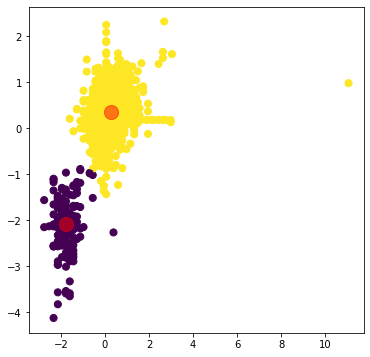

In [130]:
X = rfm_std
y_kmeans = kmeans.predict(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

Should we use more clusters to gain a more accurate model? Let's try k=4:

In [131]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=1957)
kmeans.fit(data_std)

data_cluster2 = data_std.assign(Cluster=kmeans.labels_)

data_cluster2.groupby('Cluster').agg({
    'age':['mean', 'count'],
    'Income':['mean', 'count'],
}).round(0)

age       Income      
         mean count   mean count
Cluster                         
0         1.0   324    1.0   324
1        -2.0   140   -2.0   140
2        -0.0   535    0.0   535
3        11.0     1    1.0     1

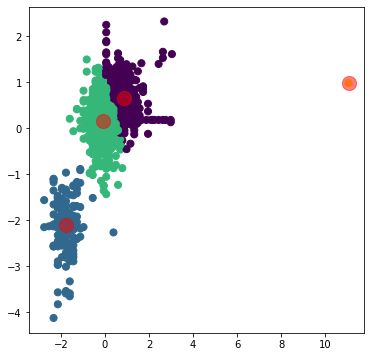

In [132]:
X = rfm_std
y_kmeans = kmeans.predict(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

Too many clusters, one of which is clustered around a single outlier value. This does not represent the data precisely. Let's try k=3 clusters:

In [133]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1957)
kmeans.fit(data_std)

data_cluster2 = data_std.assign(Cluster=kmeans.labels_)

data_cluster2.groupby('Cluster').agg({
    'age':['mean', 'count'],
    'Income':['mean', 'count'],
}).round(0)

age       Income      
        mean count   mean count
Cluster                        
0       -0.0   539    0.0   539
1       -2.0   140   -2.0   140
2        1.0   321    1.0   321

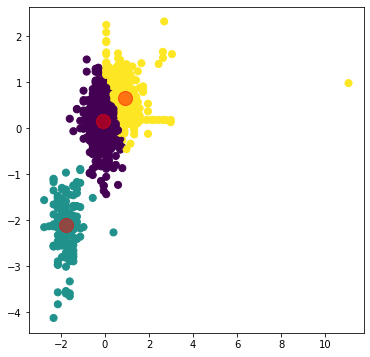

In [134]:
X = rfm_std
y_kmeans = kmeans.predict(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

I believe we can work with this data very well, as it is more specific and precise than k=2 clusters, and much more reliable and representative than k=4 clusters. k=3 clusters appears as the sweet spot! We have now clustered our customers by age and income segments of our sample. 